In [1]:
from src.luxai_s3.wrappers import LuxAIS3GymEnv
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
import math
from collections import deque
from torch.distributions import Categorical
from tqdm import tqdm
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


In [14]:
import scipy
import scipy.signal
a = torch.zeros(12,12)
a[5,5] = 1
b = torch.ones(5,5)

torch.clamp(torch.from_numpy(scipy.signal.convolve2d(a,b,mode='same',fillvalue=0)),max=1)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

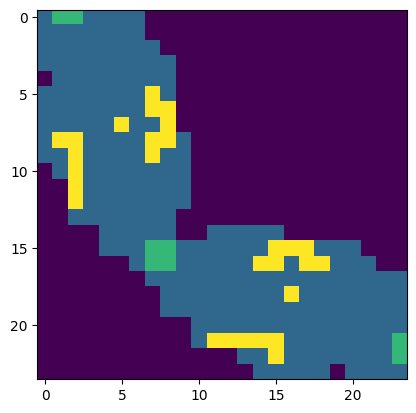

In [8]:
import random 

def random_seed(length):
    random.seed()
    min = 10**(length-1)
    max = 9*min + (min-1)
    return random.randint(min, max)

for i in range(1):
    env = LuxAIS3GymEnv(numpy_output=True)
    obs,_ = env.reset(seed=random_seed(10))
    for i in range(50) :
        action = dict(
                    player_0=np.random.randint(0,4,size=(env.env_params.max_units, 3)),
                    player_1=np.random.randint(0,4,size=(env.env_params.max_units, 3))
                )
        obs, reward, terminated, truncated, info = env.step(action)
x = torch.from_numpy(obs['player_0']['map_features']['tile_type'])
plt.imshow(x + torch.rot90(x,2).T)
plt.show()

In [ ]:
env = LuxAIS3GymEnv(numpy_output=True)
ref = env.env_params
print(ref)
for _ in range(10) :
    obs,_ = env.reset()
    print(env.env_params)



EnvParams(max_steps_in_match=100, map_type=1, map_width=24, map_height=24, num_teams=2, match_count_per_episode=5, max_units=16, init_unit_energy=100, min_unit_energy=0, max_unit_energy=400, unit_move_cost=2, spawn_rate=3, unit_sap_cost=10, unit_sap_range=4, unit_sap_dropoff_factor=0.5, unit_energy_void_factor=0.125, max_energy_nodes=6, max_energy_per_tile=20, min_energy_per_tile=-20, max_relic_nodes=6, relic_config_size=5, fog_of_war=True, unit_sensor_range=2, nebula_tile_vision_reduction=1, nebula_tile_energy_reduction=0, nebula_tile_drift_speed=-0.05, energy_node_drift_speed=0.02, energy_node_drift_magnitude=5)
EnvParams(max_steps_in_match=100, map_type=1, map_width=24, map_height=24, num_teams=2, match_count_per_episode=5, max_units=16, init_unit_energy=100, min_unit_energy=0, max_unit_energy=400, unit_move_cost=4, spawn_rate=3, unit_sap_cost=46, unit_sap_range=4, unit_sap_dropoff_factor=0.5, unit_energy_void_factor=0.125, max_energy_nodes=6, max_energy_per_tile=20, min_energy_per_

In [2]:
env = LuxAIS3GymEnv(numpy_output=True)
obs,_ = env.reset()

for i in tqdm(range(10)) :
    action = dict(
                player_0=np.random.randint(0,4,size=(env.env_params.max_units, 3)),
                player_1=np.random.randint(0,4,size=(env.env_params.max_units, 3))
            )
    obs, reward, terminated, truncated, info = env.step(action)

print(obs)


100%|██████████| 10/10 [00:01<00:00,  5.11it/s]

{'player_0': {'units': {'position': array([[[ 4,  0],
        [ 3,  0],
        [ 0,  0],
        [ 0,  0],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1]],

       [[-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1]]], dtype=int16), 'energy': array([[ 52,  68,  96, 100,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1],
       [ -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1]], dtype=int16)}, 'units_mask': array([[ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False],
       

In [100]:
print(obs)

{'player_0': {'units': {'position': array([[[ 0,  0],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1]],

       [[-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1]]], dtype=int16), 'energy': array([[100,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1],
       [ -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1]], dtype=int16)}, 'units_mask': array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       

In [34]:
class Policy(nn.Module) :

    def __init__(self,player) :

        super(Policy,self).__init__()

        if player == 'player_0' :
            self.player_id = 0
        elif player == 'player_1':
            self.player_id = 1
        else :
            raise Exception("Error in player number") 

        self.n_action = 6
        self.n_units = 16
        self.max_sap_range = 8
        self.n_input_maps = 3
        self.max_relic_nodes = 6
        self.map_height = 24
        self.map_width = 24

        self.actor_size = [2048,1024,512,256]
        self.cnn_channels = [3,9,27]
        self.cnn_kernels = [3,5,9]
        self.cnn_strides = [1,1,1]
        self.critic_size = [512,256,128,64]

        self.activation = nn.ReLU()
        self.max_pooling = nn.MaxPool2d(kernel_size=2)

        self.cnn_inputs = nn.Conv2d(self.n_input_maps,
                                    self.cnn_channels[0],
                                    kernel_size=self.cnn_kernels[0],
                                    padding=self.cnn_kernels[0]-1,
                                    stride=self.cnn_strides[0],
                                    dtype=torch.float)
        
        self.cnn_hidden = [nn.Conv2d(self.cnn_channels[i],
                                     self.cnn_channels[i+1],
                                     kernel_size=self.cnn_kernels[i+1],
                                     padding=self.cnn_kernels[i+1]-1,
                                    stride=self.cnn_strides[i+1],
                                    dtype=torch.float) for i in range(len(self.cnn_channels)-1)]
        
        state_maps = torch.zeros(self.n_input_maps,self.map_width,self.map_height)
        state_features = torch.zeros(8*self.n_units + self.max_relic_nodes*3 + 6 + 4)
        
        with torch.no_grad() :
            x = self.cnn_inputs(state_maps)
            x = self.max_pooling(x)
            for layer in self.cnn_hidden :
                x = layer(x)
                x = self.max_pooling(x)
            self.n_input_features = x.flatten(start_dim=0).size(0) + state_features.size(0)
        
        self.inputs_actor = nn.Linear(self.n_input_features,self.actor_size[0],dtype=torch.float)
        self.hidden_actor = [nn.Linear(self.actor_size[i],self.actor_size[i+1],dtype=torch.float) for i in range(len(self.actor_size)-1)]

        self.actor_action = nn.Linear(self.actor_size[-1],self.n_action*self.n_units,dtype=torch.float)
        self.actor_dx = nn.Linear(self.actor_size[-1],(self.max_sap_range*2+1)*self.n_units,dtype=torch.float)
        self.actor_dy = nn.Linear(self.actor_size[-1],(self.max_sap_range*2+1)*self.n_units,dtype=torch.float)

        self.inputs_critic = nn.Linear(self.n_input_features,self.critic_size[0],dtype=torch.float)
        self.hidden_critic = [nn.Linear(self.critic_size[i],self.critic_size[i+1],dtype=torch.float) for i in range(len(self.critic_size)-1)]
        self.outputs_critic = nn.Linear(self.critic_size[-1],1,dtype=torch.float)

    def obs_to_state(self,obs:dict,ep_params:dict) -> torch.Tensor:
        list_state_features = []

        state_maps = torch.zeros(3,24,24,dtype=torch.float)

        state_maps[0] = torch.from_numpy(obs['map_features']['energy'].astype(np.float32)) #map_energy
        state_maps[1] = torch.from_numpy(obs['sensor_mask'].astype(np.float32)) #sensor_mask
        state_maps[2] = torch.from_numpy(obs['map_features']['tile_type'].astype(np.float32)) #map_tile_type

        #Units
        list_state_features.append(torch.from_numpy(obs['units']['position'].astype(np.float32)).flatten()/24) #position
        list_state_features.append(torch.from_numpy(obs['units']['energy'].astype(np.float32)).flatten()/400) #energy
        list_state_features.append(torch.from_numpy(obs['units_mask'].astype(np.float32)).flatten()) #unit_mask

        list_state_features.append(torch.from_numpy(obs['relic_nodes'].astype(np.float32)).flatten()) #relic_nodes
        list_state_features.append(torch.from_numpy(obs['relic_nodes_mask'].astype(np.float32)).flatten()) #relic_nodes_mask

        #Game
        list_state_features.append(torch.from_numpy(obs['team_points'].astype(np.float32)).flatten()/3000) #team_points
        list_state_features.append(torch.from_numpy(obs['team_wins'].astype(np.float32)).flatten()/5) #team_wins

        list_state_features.append(torch.from_numpy(obs['steps'].astype(np.float32)).flatten()/100) #steps
        list_state_features.append(torch.from_numpy(obs['match_steps'].astype(np.float32)).flatten()/5) #match_steps

        list_state_features.append(torch.FloatTensor([ep_params['unit_move_cost'],ep_params['unit_sap_cost'],ep_params['unit_sap_range'],ep_params['unit_sensor_range']])) #Static information about the episode

        state_features = torch.cat(list_state_features)

        return state_maps , state_features

    def training_forward(self,x_maps,x_features,action,mask_action,mask_dx,mask_dy) :

        x = self.activation(self.cnn_inputs(x_maps))
        x = self.max_pooling(x)
        for layer in self.cnn_hidden :
            x = self.activation(layer(x))
            x = self.max_pooling(x)
        x_input = torch.cat((x.flatten(start_dim=1),x_features),dim=-1)

        x = self.activation(self.inputs_actor(x_input))
        for layer in self.hidden_actor :
            x = self.activation(layer(x))

        actor_action = self.actor_action(x).view(-1,self.n_units,self.n_action) + torch.nan_to_num(mask_action*(-torch.inf))
        actor_dx = self.actor_dx(x).view(-1,self.n_units,self.max_sap_range*2+1) + torch.nan_to_num(mask_dx*(-torch.inf))
        actor_dy = self.actor_dy(x).view(-1,self.n_units,self.max_sap_range*2+1) + torch.nan_to_num(mask_dy*(-torch.inf))

        actor_action = F.log_softmax(actor_action,dim=-1)
        actor_dx = F.log_softmax(actor_dx,dim=-1)
        actor_dy = F.log_softmax(actor_dy,dim=-1)

        x = self.activation(self.inputs_critic(x_input))
        for layer in self.hidden_critic :
            x = self.activation(layer(x))
        value = self.outputs_critic(x)

        # Computing log probabilities for the actions

        batch_size = actor_action.size(0)
        n_units = actor_action.size(1)

        step_indices = torch.arange(batch_size).unsqueeze(1).expand(-1, n_units)
        unit_indices = torch.arange(n_units).unsqueeze(0).expand(batch_size, -1) 

        log_prob = torch.sum(actor_action[step_indices,unit_indices, action[:,:, 0]],axis=1,dtype=torch.float)
        log_prob += torch.sum(actor_dx[step_indices,unit_indices, action[:,:, 1]+self.max_sap_range],axis=1,dtype=torch.float)
        log_prob += torch.sum(actor_dy[step_indices,unit_indices, action[:,:, 2]+self.max_sap_range],axis=1,dtype=torch.float)

        return value,log_prob.view(-1,1)

    def forward(self,x_maps,x_features,obs,ep_params) :

        x = self.activation(self.cnn_inputs(x_maps))
        x = self.max_pooling(x)
        for layer in self.cnn_hidden :
            x = self.activation(layer(x))
            x = self.max_pooling(x)

        x_input = torch.cat((x.flatten(start_dim=0),x_features),dim=-1)

        x = self.activation(self.inputs_actor(x_input))
        for layer in self.hidden_actor :
            x = self.activation(layer(x))

        state = {}
        state['energy'] = torch.from_numpy(obs['units']['energy'][self.player_id].astype(int)).view(self.n_units)
        state['units'] = torch.from_numpy(obs['units']['position'][self.player_id].astype(int)).view(self.n_units,2)
        state['map'] = torch.from_numpy(obs['map_features']['tile_type'].astype(int)).view(24,24)
        
        energy_mask = state['energy'] < ep_params['unit_move_cost']
        sap_mask = state['energy'] < ep_params['unit_sap_cost']

        mask_action = torch.zeros(self.n_units,self.n_action,dtype=torch.int8)
        mask_dx = torch.zeros(self.n_units,self.max_sap_range*2+1,dtype=torch.int8)
        mask_dy = torch.zeros(self.n_units,self.max_sap_range*2+1,dtype=torch.int8)

        mask_action[torch.where(energy_mask)[0],1:] += 1
        mask_action[torch.where(sap_mask)[0],-1] += 1

        directions = torch.tensor([[0,-1],[1,0],[0,1],[-1,0]]).view(4,2)
        target_tiles = state['units'].unsqueeze(1).expand(self.n_units, 4, 2) + directions
        clamp_target_tiles = torch.clamp(target_tiles,0,23).view(self.n_units*4,2)
        target_tiles_type = state['map'][clamp_target_tiles[:,0],clamp_target_tiles[:,1]].view(self.n_units,4)

        correct_move_direction = (((target_tiles >= 0) & (target_tiles <= 23)).all(dim=-1)) & (target_tiles_type != 2)
        forbidden_move = 1 - correct_move_direction.int() 
        mask_action[:,1:-1] += forbidden_move
        
        
        actor_action = self.actor_action(x).view(self.n_units,self.n_action) + torch.nan_to_num(mask_action*(-torch.inf))
        actor_action = F.log_softmax(actor_action,dim=-1)
        action_choice = Categorical(logits=actor_action).sample()

        sap_mask =  sap_mask | (action_choice !=5)

        mask_dx[:,:self.max_sap_range-ep_params['unit_sap_range']] += 1
        mask_dx[:,self.max_sap_range+ep_params['unit_sap_range']:] += 1
        mask_dy[:,:self.max_sap_range-ep_params['unit_sap_range']] += 1
        mask_dy[:,self.max_sap_range+ep_params['unit_sap_range']:] += 1

        mask_dx[torch.where(sap_mask)[0]] += 1
        mask_dy[torch.where(sap_mask)[0]] += 1

        directions = torch.arange(-ep_params['unit_sap_range'],ep_params['unit_sap_range']+1).view(2*ep_params['unit_sap_range']+1)
        expand_postion = state['units'].unsqueeze(1).expand(self.n_units,2*ep_params['unit_sap_range']+1,2)
        target_dx = expand_postion[:,:,0].view(self.n_units,2*ep_params['unit_sap_range']+1) + directions
        target_dy = expand_postion[:,:,1].view(self.n_units,2*ep_params['unit_sap_range']+1) + directions

        forbidden_dx = ((target_dx<0) | (target_dx>23)).int()
        forbidden_dy = ((target_dy<0) | (target_dy>23)).int()

        mask_dx[:,self.max_sap_range-ep_params['unit_sap_range']:self.max_sap_range+ep_params['unit_sap_range']+1] += forbidden_dx
        mask_dy[:,self.max_sap_range-ep_params['unit_sap_range']:self.max_sap_range+ep_params['unit_sap_range']+1] += forbidden_dy

        mask_dx[:,self.max_sap_range] = 0
        mask_dy[:,self.max_sap_range] = 0

        actor_dx = self.actor_dx(x).view(self.n_units,self.max_sap_range*2+1) + torch.nan_to_num(mask_dx*(-torch.inf))
        actor_dy = self.actor_dy(x).view(self.n_units,self.max_sap_range*2+1) + torch.nan_to_num(mask_dy*(-torch.inf))
        actor_dx = F.log_softmax(actor_dx,dim=-1)
        actor_dy = F.log_softmax(actor_dy,dim=-1)

        # Sampling action based on the policy
        action = torch.zeros(self.n_units, 3, dtype=torch.int)

        action[:, 0] = action_choice
        action[:, 1] = Categorical(logits=actor_dx).sample() - self.max_sap_range
        action[:, 2] = Categorical(logits=actor_dy).sample() - self.max_sap_range

        x = self.activation(self.inputs_critic(x_input))
        for layer in self.hidden_critic :
            x = self.activation(layer(x))
        value = self.outputs_critic(x)

        return action, value, mask_action, mask_dx, mask_dy 

#env = LuxAIS3GymEnv(numpy_output=True)
obs,_ = env.reset()

ep_params = {}

ep_params['unit_move_cost'] = env.env_params.unit_move_cost
ep_params['unit_sap_cost'] = env.env_params.unit_sap_cost
ep_params['unit_sap_range'] = env.env_params.unit_sap_range
ep_params['unit_sensor_range'] = env.env_params.unit_sensor_range

for i in tqdm(range(50)) :
    action = dict(
                player_0=np.random.randint(0,4,size=(env.env_params.max_units, 3)),
                player_1=np.random.randint(0,4,size=(env.env_params.max_units, 3))
            )
    obs, reward, terminated, truncated, info = env.step(action)

model = Policy('player_0')

state_maps, state_features = model.obs_to_state(obs['player_0'],ep_params)

model(state_maps,state_features,obs['player_0'],ep_params)



100%|██████████| 50/50 [00:00<00:00, 783.33it/s]


(tensor([[ 5, -2,  2],
         [ 1,  0,  0],
         [ 3,  0,  0],
         [ 4,  0,  0],
         [ 4,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 2,  0,  0],
         [ 1,  0,  0],
         [ 4,  0,  0],
         [ 5,  0,  2],
         [ 4,  0,  0],
         [ 4,  0,  0],
         [ 3,  0,  0],
         [ 2,  0,  0],
         [ 3,  0,  0]], dtype=torch.int32),
 tensor([-0.0162], grad_fn=<ViewBackward0>),
 tensor([[0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 1, 2],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]], dtype=torch.int8),
 tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
         [2, 2, 2, 2

tensor(-0.3929, dtype=torch.float64) tensor(0.9731, dtype=torch.float64)
